# User Churn Rate Prediction

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set(style = 'white')

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [120]:
df = pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [122]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [123]:
# Passed a dictionary to astype() function  
df = df.astype({"customerID":'category',
                "gender":'category',
                "SeniorCitizen":'category',
                "Partner":'category',
                "Dependents":'category',
                "tenure":'float64',
                "PhoneService":'category',
                "MultipleLines":'category',
                "InternetService":'category',
                "OnlineSecurity":'category',
                "OnlineBackup":'category',
                "DeviceProtection":'category',
                "TechSupport":'category',
                "StreamingTV":'category',
                "StreamingMovies":'category',
                "Contract":'category',
                "PaperlessBilling":'category',
                "PaymentMethod":'category',
                "MonthlyCharges": 'float64'
               })

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [125]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [126]:
# fill missing values with mean column values
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [127]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [128]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

df_gender = pd.get_dummies(df['gender'])
df_gender.head()

In [129]:
df['Churn'] = df['Churn'].replace({'No':0, 'Yes':1})

df.loc[df.Churn=='No','Churn'] = 0 
df.loc[df.Churn=='Yes','Churn'] = 1

In [130]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


df_churn = pd.get_dummies(df['Churn'])
df_churn.head(2)

df_churn = df_churn.drop(['Yes'], axis=1)
df_churn.head(2)

df_churn = df_churn.rename(columns = {'No' : 'Churn'})
df_churn.head(2)

df_churn.head(5)

df = df.drop(['Churn'], axis=1)
df.head(2)

## Exploratory Data Analysis

In [131]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

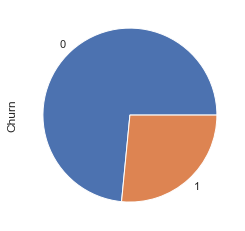

In [132]:
df.Churn.value_counts().plot(kind='pie')

In [133]:
Total_churned_cust = (df.Churn.value_counts()[1])/(df.Churn.value_counts()[0] + df.Churn.value_counts()[1])
Total_churned_cust

0.2653698707936959

### 1. Gender vs Churn

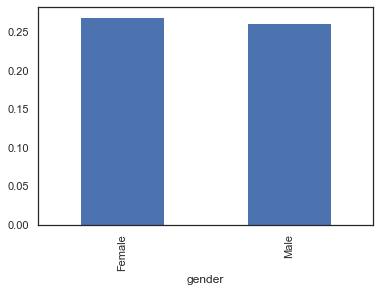

In [134]:
df.groupby('gender').Churn.mean().plot(kind = 'bar')

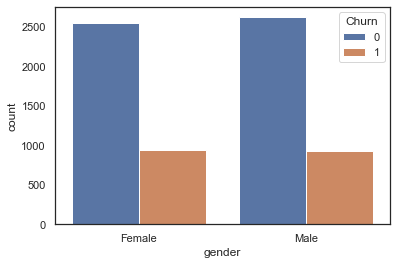

In [135]:
sns.countplot(data = df, x = df['gender'], hue = df['Churn'])

In [136]:
df.groupby('gender').Churn.mean()

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

In [137]:
df[['gender', 'Churn']].groupby('gender').mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [138]:
df[['gender', 'Churn']].groupby('gender').count()

,Churn
gender,
Female,3488
Male,3555


#### Churn rate for Female as well as male seems to be almost the same. However male churn rate > female curn rate.

### 2. Senior Citizen vs Churn rate

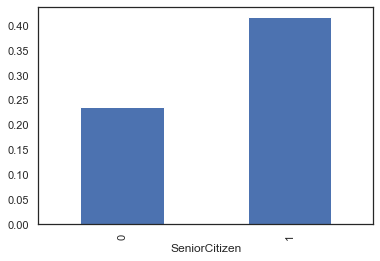

In [139]:
df.groupby('SeniorCitizen').Churn.mean().plot(kind = 'bar')

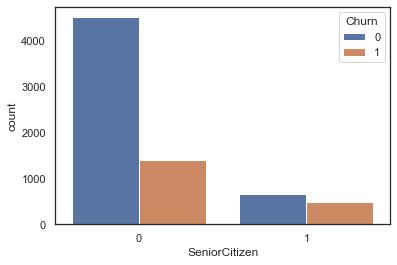

In [140]:
sns.countplot(data = df, x = 'SeniorCitizen', hue = 'Churn')

In [141]:
df.groupby('SeniorCitizen').Churn.mean()

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

In [142]:
df[['SeniorCitizen', 'Churn']].groupby('SeniorCitizen').agg(['count', 'mean'])

Churn          
              count      mean
SeniorCitizen                
0              5901  0.236062
1              1142  0.416813

### Non-Senior Citizens have more Churn rates than Senior Citizens.

### 3. Partner vs Churn rate

In [143]:
df.groupby('Partner').Churn.mean()

Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64

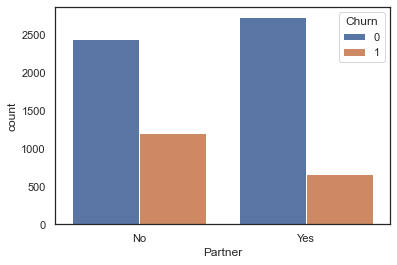

In [144]:
sns.countplot(data = df, x = 'Partner', hue = 'Churn')

### No Partners -> tend to have higher churn rates.

### 4. Dependents vs Churn rate

In [145]:
df.groupby('Dependents').Churn.mean()

Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64

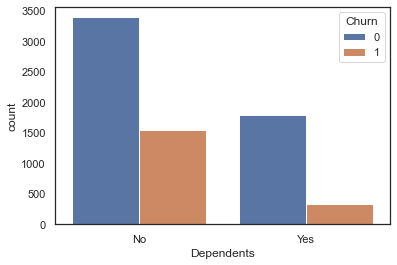

In [146]:
sns.countplot(data = df, x = 'Dependents', hue = 'Churn')

### No Dependents -> Higher churn rates.

### 5. tenure vs Churn rate

In [147]:
df.groupby('tenure').Churn.mean()

tenure
0.0     0.000000
1.0     0.619902
2.0     0.516807
3.0     0.470000
4.0     0.471591
          ...   
68.0    0.090000
69.0    0.084211
70.0    0.092437
71.0    0.035294
72.0    0.016575
Name: Churn, Length: 73, dtype: float64

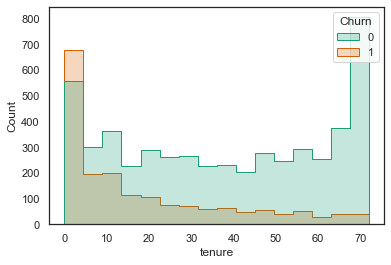

In [148]:
#print(sns.__version__)
sns.histplot(data=df, x="tenure", hue="Churn", palette="Dark2", element='step')

### Lower the Tenure, Higher is the CHURN RATE!

In [149]:
# pip install seaborn==0.11.0  

### 6. PhoneService vs Churn rate

In [150]:
df.groupby('PhoneService').Churn.mean()

PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64

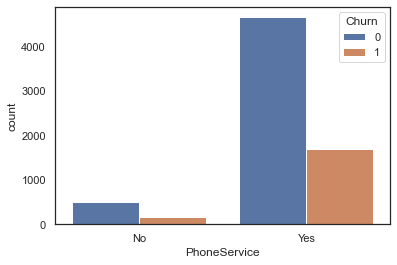

In [151]:
sns.countplot(data = df, x = 'PhoneService', hue = 'Churn')

### Phone Service = Yes -> Higher churn rates.

### 7. MultipleLines vs Churn rate

In [152]:
df.groupby('MultipleLines').Churn.mean()

MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64

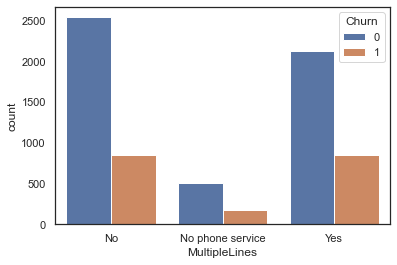

In [153]:
sns.countplot(data = df, x = 'MultipleLines', hue = 'Churn')

### More Multiple lines -> More churn rates.

### 8. InternetService vs Churn rate

In [154]:
df.groupby('InternetService').Churn.mean()

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64

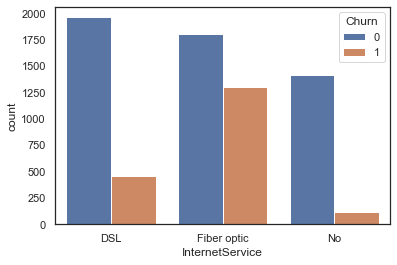

In [155]:
sns.countplot(data = df, x = 'InternetService', hue = 'Churn')

### Fiber Optic Internet Service -> Has highest Churn rates!

### 9. OnlineSecurity vs Churn rate

In [156]:
df.groupby('OnlineSecurity').Churn.mean()

OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64

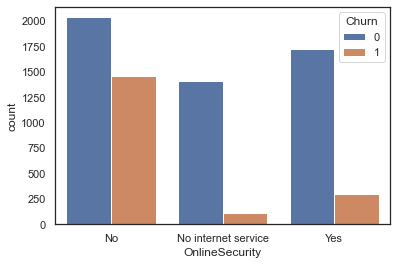

In [157]:
sns.countplot(data = df, x = 'OnlineSecurity', hue = 'Churn')

### OnlineSecurity => Higher churn rates.

### 10. OnlineBackup vs Churn rate

In [158]:
df.groupby('OnlineBackup').Churn.mean()

OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64

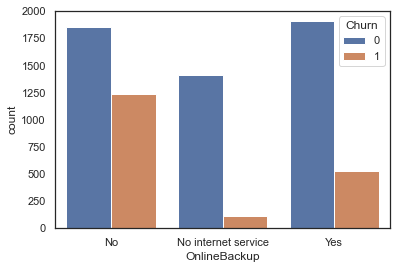

In [159]:
sns.countplot(data = df, x = 'OnlineBackup', hue = 'Churn')

### NO Online Backup => Higher churn rates.

### 11. DeviceProtection vs Churn rate

In [160]:
df.groupby('DeviceProtection').Churn.mean()

DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn, dtype: float64

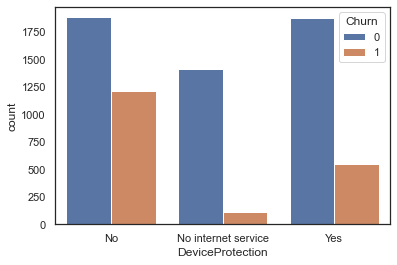

In [161]:
sns.countplot(data = df, x = 'DeviceProtection', hue = 'Churn')

### NO Device protection => Higher churn rates.

### 12. TechSupport vs Churn rate

In [162]:
df.groupby('TechSupport').Churn.mean()

TechSupport
No                     0.416355
No internet service    0.074050
Yes                    0.151663
Name: Churn, dtype: float64

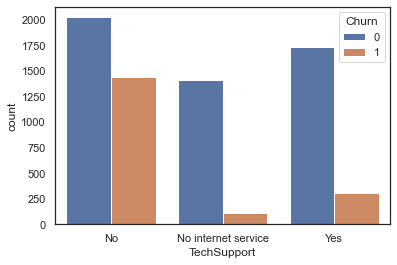

In [163]:
sns.countplot(data = df, x = 'TechSupport', hue = 'Churn')

### NO Tech Support => Higher churn rates.

### 13. StreamingTV vs Churn rate

In [164]:
df.groupby('StreamingTV').Churn.mean()

StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn, dtype: float64

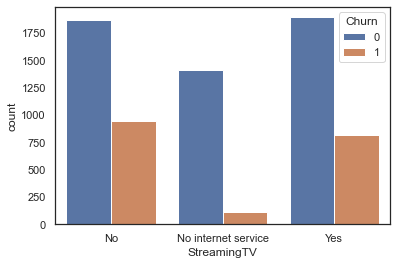

In [165]:
sns.countplot(data = df, x = 'StreamingTV', hue = 'Churn')

### NO Streaming TV => Higher churn rates.

### 14. StreamingMovies vs Churn rate

In [166]:
df.groupby('StreamingMovies').Churn.mean()

StreamingMovies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: Churn, dtype: float64

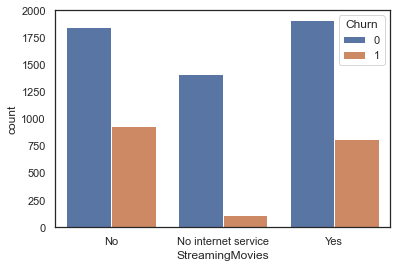

In [167]:
sns.countplot(data = df, x = 'StreamingMovies', hue = 'Churn')

### NO Streaming Movies => Higher churn rates.

### 15. Contract vs Churn rate

In [168]:
df.groupby('Contract').Churn.mean()

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

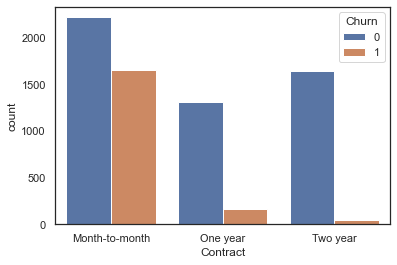

In [169]:
sns.countplot(data = df, x = 'Contract', hue = 'Churn')

### Month-on-Month contract  => Higher churn rates.

### 16. PaperlessBilling vs Churn rate

In [170]:
df.groupby('PaperlessBilling').Churn.mean()

PaperlessBilling
No     0.163301
Yes    0.335651
Name: Churn, dtype: float64

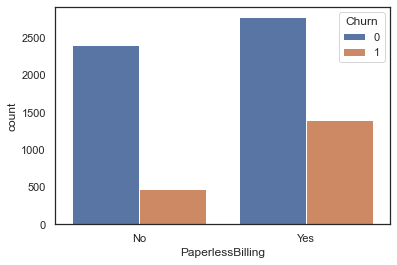

In [171]:
sns.countplot(data = df, x = 'PaperlessBilling', hue = 'Churn')

### Paper less Billing = YES => Higher churn rates.

### 17. PaymentMethod vs Churn rate

In [172]:
df.groupby('PaymentMethod').Churn.mean()

PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn, dtype: float64

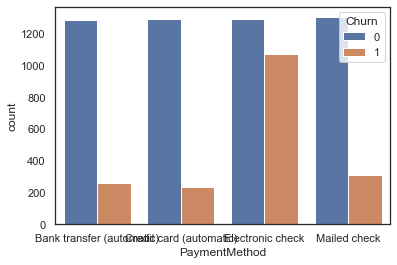

In [173]:
sns.countplot(data = df, x = 'PaymentMethod', hue = 'Churn')

### Payment Method = "Electronic Check" => Higher churn rates.

### MonthlyCharges vs churn rate 

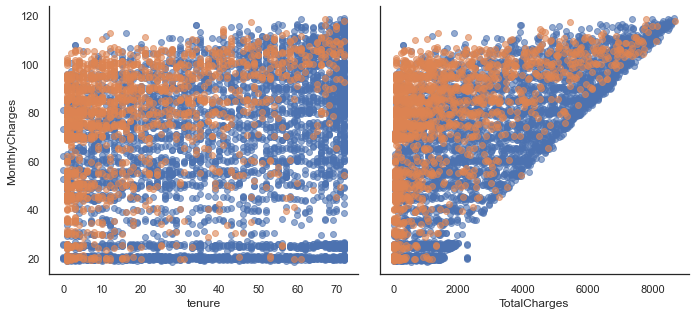

In [174]:
g = sns.PairGrid(df, y_vars=["MonthlyCharges"], x_vars=["tenure", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)


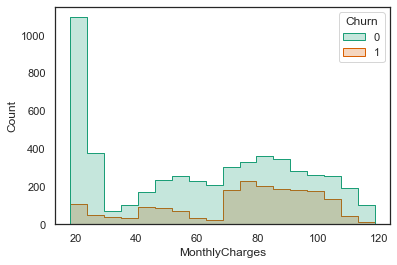

In [175]:
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", palette="Dark2", element='step')

### TotalCharges vs churn rate 

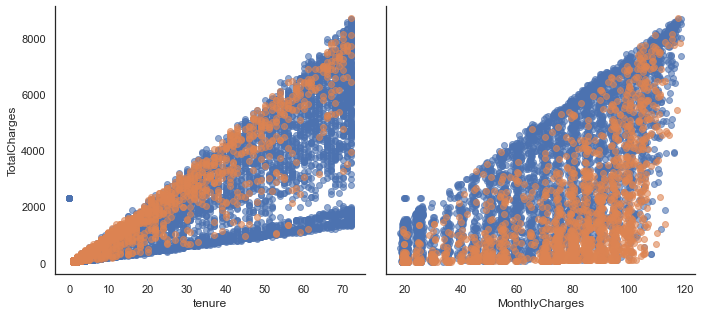

In [176]:
g = sns.PairGrid(df, y_vars=["TotalCharges"], x_vars=["tenure", "MonthlyCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

### Correlation:

In [177]:
plt.figure(figsize=(12, 6))
df.drop('customerID', axis=1, inplace=True)

<Figure size 864x432 with 0 Axes>

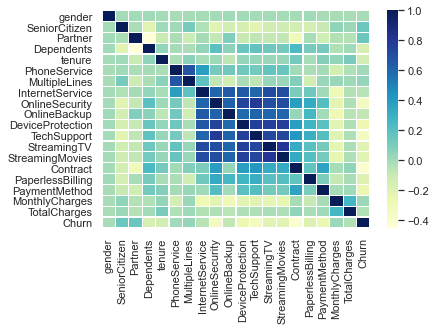

In [178]:
df_corr = df.apply(lambda x: pd.factorize(x)[0])
ax = sns.heatmap(df_corr.corr(), xticklabels=df_corr.columns, yticklabels=df_corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

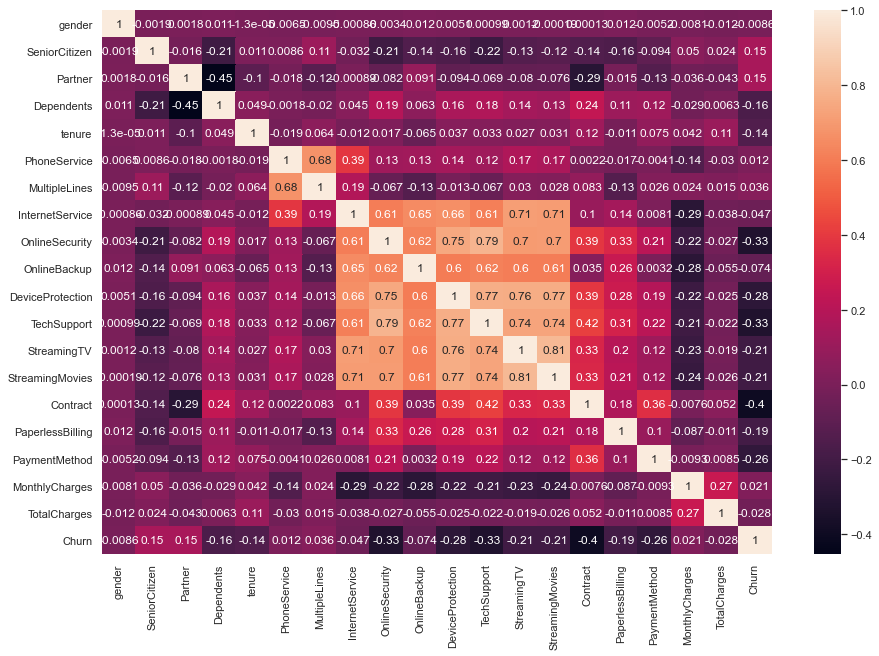

In [179]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True)

In [180]:
corr_matrix = df.corr()

print(corr_matrix["Churn"].sort_values(ascending=False))

Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199428
tenure           -0.352229
Name: Churn, dtype: float64


### Numerical Features EDA :

In [181]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [182]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370
std,24.559481,30.090047,2265.000258,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,402.225000,0.000000
50%,29.000000,70.350000,1400.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


### ONE HOT ENCODING (CONVERTING CATEGORICAL FEATURES TO NUMERIC) :

In [183]:
# One-hot encode
df = pd.get_dummies(df)

In [184]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34.0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2.0,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45.0,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2.0,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [185]:
df.nunique()

tenure                                       73
MonthlyCharges                             1585
TotalCharges                               6531
Churn                                         2
gender_Female                                 2
gender_Male                                   2
SeniorCitizen_0                               2
SeniorCitizen_1                               2
Partner_No                                    2
Partner_Yes                                   2
Dependents_No                                 2
Dependents_Yes                                2
PhoneService_No                               2
PhoneService_Yes                              2
MultipleLines_No                              2
MultipleLines_No phone service                2
MultipleLines_Yes                             2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
OnlineSecurity_No                       

In [186]:
# Drop redundant columns (for features with two unique values)
drop = ['SeniorCitizen_0', 'gender_Female', 'Partner_No','Dependents_No', 'PhoneService_No', 
        'MultipleLines_No','OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn']


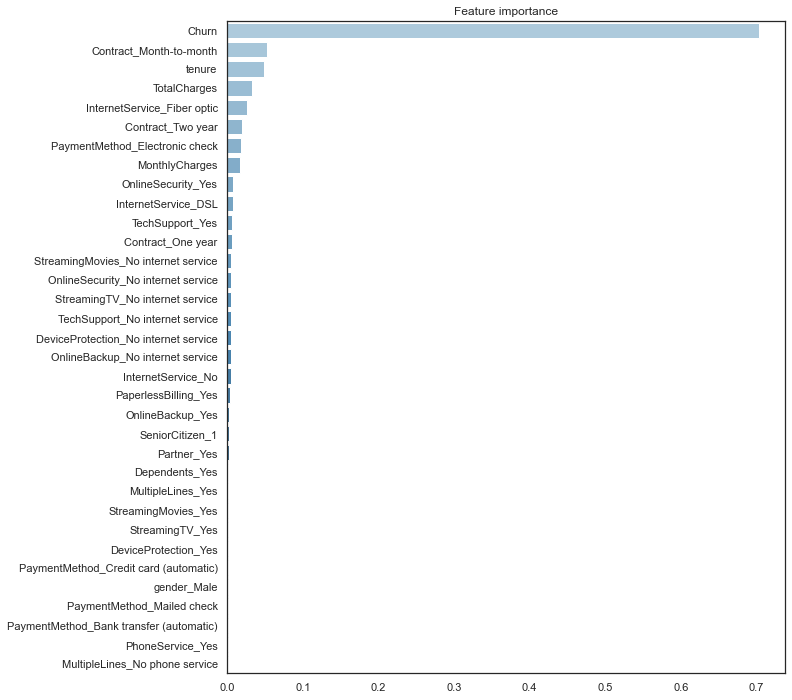

In [187]:
# Fit RandomForest Classifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

### Target variable distribution :

In [188]:
target = ['Churn']
df[target].value_counts()

Churn
0        5174
1        1869
dtype: int64

### Correlation:

In [191]:
corr_matrix = df.corr()

print(corr_matrix["Churn"].sort_values(ascending=False))

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen_1                            0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

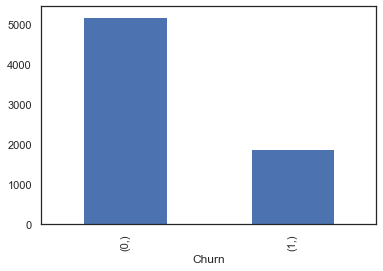

In [192]:
df[target].value_counts().plot(kind = 'bar');

In [193]:
#create feature set and labels
X = df.drop(['Churn'],axis=1)
y = df.Churn


In [194]:
#train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [195]:
X_train.shape

(5634, 46)

In [196]:
y_train.shape

(5634,)

In [197]:
X_test.shape

(1409, 46)

In [198]:
y_test.shape

(1409,)

In [199]:
y_train.head()

1182    0
4328    0
6091    1
4870    0
4683    0
Name: Churn, dtype: int64

In [200]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34.0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2.0,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45.0,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2.0,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [201]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1182,57.0,53.75,3196.00,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4328,15.0,51.10,711.15,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
6091,2.0,86.85,156.35,0,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
4870,48.0,64.40,3035.35,0,1,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4683,24.0,94.10,2322.85,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,39.0,49.80,1971.15,0,1,1,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0
3441,34.0,60.80,2042.05,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1344,28.0,20.50,563.05,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4623,69.0,95.35,6382.00,0,1,0,1,0,1,1,...,1,1,0,0,0,1,1,0,0,0


In [202]:
X_test

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6418,31.0,79.30,2484.00,0,1,1,0,0,1,1,...,1,0,1,0,0,1,0,0,0,1
1948,2.0,80.75,159.45,1,0,1,0,1,0,1,...,1,1,0,0,1,0,0,0,1,0
4497,60.0,97.95,5867.00,0,1,0,1,0,1,1,...,1,0,1,0,0,1,0,0,1,0
66,47.0,78.90,3650.35,0,1,1,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
1705,55.0,90.45,5044.80,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,12.0,20.15,260.70,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5938,34.0,108.90,3625.20,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6373,44.0,92.95,4122.90,0,1,1,0,0,1,0,...,1,1,0,0,0,1,1,0,0,0
1767,71.0,115.15,8078.10,1,0,1,0,0,1,1,...,1,0,0,1,0,1,0,1,0,0


### Balancing the imbalanced dataset:

In [203]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [204]:
X_train.shape

(5634, 46)

In [205]:
X_resampled.shape

(8216, 46)

In [206]:
y_resampled.shape

(8216,)

In [207]:
y_train.shape

(5634,)

In [208]:
X_test.shape

(1409, 46)

In [209]:
y_test.shape

(1409,)

### Model : Decision Tree Classifier

In [210]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

In [211]:
model.fit(X_resampled, y_resampled)
pred = model.predict(X_test)

In [212]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1066
           1       0.46      0.69      0.55       343

    accuracy                           0.73      1409
   macro avg       0.67      0.72      0.68      1409
weighted avg       0.78      0.73      0.75      1409



### Model : XGBOOST

In [213]:
import xgboost as xgb

In [ ]:
#building the model

#import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_resampled,
                                                                                                           y_resampled)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_resampled, y_resampled)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_resampled.columns], y_test)))

In [216]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1066
           1       0.59      0.57      0.58       343

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [217]:
# confusion matrics to find precision and recall
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[931, 135],
       [147, 196]], dtype=int64)

In [218]:
# Looking at the precision score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5921450151057401

In [219]:
# Looking at the recall score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5714285714285714

In [220]:
# find probability for each prediction
prob = xgb_model.predict_proba(X_test)[:,1]

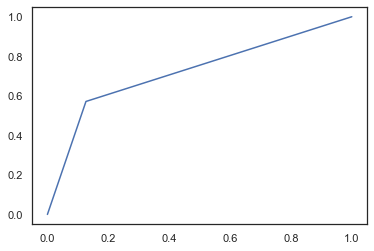

In [221]:
# look at ROC curve, which gives us the false and true positive predictions
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)



In [222]:
# Looking at the area under the curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test, prob)
auc

0.8476293492470695

In [223]:
#looking at the f1_score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5816023738872403

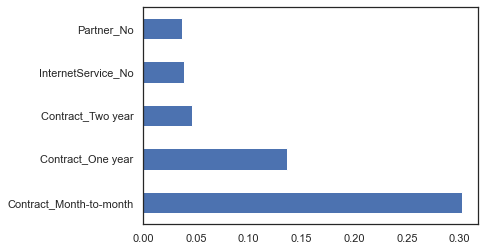

In [224]:
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_resampled.columns)
feat_importances.nlargest(5).plot(kind='barh')

## Model : RandomForestClassifier

In [225]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [226]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_resampled, y_resampled.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 50}

0.757 (+/-0.047) for {'max_depth': 2, 'n_estimators': 5}
0.77 (+/-0.052) for {'max_depth': 2, 'n_estimators': 50}
0.761 (+/-0.022) for {'max_depth': 2, 'n_estimators': 250}
0.793 (+/-0.081) for {'max_depth': 4, 'n_estimators': 5}
0.8 (+/-0.067) for {'max_depth': 4, 'n_estimators': 50}
0.802 (+/-0.077) for {'max_depth': 4, 'n_estimators': 250}
0.824 (+/-0.128) for {'max_depth': 8, 'n_estimators': 5}
0.837 (+/-0.13) for {'max_depth': 8, 'n_estimators': 50}
0.838 (+/-0.127) for {'max_depth': 8, 'n_estimators': 250}
0.825 (+/-0.17) for {'max_depth': 16, 'n_estimators': 5}
0.841 (+/-0.179) for {'max_depth': 16, 'n_estimators': 50}
0.841 (+/-0.186) for {'max_depth': 16, 'n_estimators': 250}
0.827 (+/-0.185) for {'max_depth': 32, 'n_estimators': 5}
0.839 (+/-0.209) for {'max_depth': 32, 'n_estimators': 50}
0.839 (+/-0.202) for {'max_depth': 32, 'n_estimators': 250}
0.817 (+/-0.185) for {'max_depth': None, 'n_estimators': 5}
0.835 (+/-0.211) 

In [227]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [228]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [229]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.1, 1, 10]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_resampled, y_resampled.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

0.703 (+/-0.036) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 5}
0.785 (+/-0.055) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
0.798 (+/-0.107) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 5}
0.839 (+/-0.17) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.807 (+/-0.145) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5}
0.842 (+/-0.194) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
0.75 (+/-0.015) for {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 5}
0.83 (+/-0.193) for {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 50}
0.828 (+/-0.169) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 5}
0.828 (+/-0.212) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}
0.823 (+/-0.204) for {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 5}
0.812 (+/-0.225) for {'learning_rate': 1, 'max_depth': 5, 'n_estim

In [230]:
xgb_predict = cv.predict(X_test)
xgb_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [231]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict))

[[928 138]
 [134 209]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1066
           1       0.60      0.61      0.61       343

    accuracy                           0.81      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409

